In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline


from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.80827,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.80784,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.80784,-1.017575,-0.664906,3.049237,0.118828,-1.270237


In [4]:
day_cycle_window = df['day_cycle_window']
df = df.drop(['day_cycle_window'], axis=1)

# 1: Observations

#### Figure ci-dessous: on voit que certaines répartirions admettent des points très éloignés de la masse

In [ ]:
sns_plot = sns.pairplot(df,hue='p1',  height=2.5);
sns_plot.savefig("repartitions.png")

/Users/axel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/axel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/axel/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/axel/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

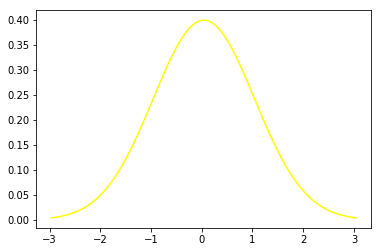

In [5]:
col = 'p1'
m = df[col].median()
s = df[col].std()
x = np.linspace(m - 3*s, m + 3*s, 100)
ins = df[stats.norm.pdf(df[col], m, s)>0.01]
outs = df[stats.norm.pdf(df[col], m, s)<0.01]
plt.figure()
plt.plot(x, stats.norm.pdf(x, m, s), color = 'yellow')
plt.hist(ins, density=True, alpha=0.5)
plt.hist(outs, density=True, alpha=0.5)
print('for column '+ col+': ',outs.shape[0], ' outliers with this method')

In [ ]:
#plt.plot(df['p1'].values, df['p2'].values, 'bo')
col1 = 'p1'
for col in df.columns:
    if(col != col1):
        with sns.axes_style('white'):
            sns.jointplot("p1", col, df, kind='hex')

for col in df.columns:
    m = df[col].median()
    s = df[col].std()
    x = np.linspace(m - 3*s, m + 3*s, 100)
    plt.figure()
    plt.plot(x, stats.norm.pdf(x, m, s), color = 'yellow')
    #plt.hist(df[col], density=True, alpha=0.5, color = 'blue')
    ins = df[stats.norm.pdf(df[col], m, s)>0.01]
    outs = df[stats.norm.pdf(df[col], m, s)<0.01]
    plt.hist(ins, density=True, alpha=0.5)
    plt.hist(outs, density=True, alpha=0.5)
    print('for column '+ col+': ',outs.shape[0], ' outliers with this method)

plt.plot(df['p1'].values[:2000], 'b')
plt.plot(df['p6'].values[:2000], 'r')
plt.plot(df['p9'].values[:2000], 'g')
plt.figure()
plt.plot(df['p1'].values[2000:6000], 'b')
plt.plot(df['p6'].values[2000:6000], 'r')
plt.plot(df['p9'].values[2000:6000], 'g')
plt.figure()
plt.plot(df['p1'].values[6000:8000], 'b')
plt.plot(df['p6'].values[6000:8000], 'r')
plt.plot(df['p9'].values[6000:8000], 'g')
plt.figure()
plt.plot(df['p1'].values[8000:16000], 'b')
plt.plot(df['p6'].values[8000:16000], 'r')
plt.plot(df['p9'].values[8000:16000], 'g')
plt.figure()
plt.plot(df['p1'].values, 'b')
plt.figure()
plt.plot(df['p6'].values, 'r')
plt.figure()
plt.plot(df['p9'].values, 'g')
df['p1'].describe()

In [ ]:
pca = PCA()
pca.fit(df)
plt.bar(np.arange(0,df.shape[1],1), pca.explained_variance_ratio_)

# 2: Tests

In [6]:
def plotAnomalies2D(df, clf_name, clf, f1, f2):
    """
        df: Pandas DataFrame containing all the points to plot (for features X1 and X2)
        clf_name: String value - name of the outlier detection model
        clf: Scikit Learn model instance - the trained outlier detection model
    """
    plt.figure()
    plt.plot(df[f1],df[f2], 'o')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.xlim([df[f1].min()-3,df[f1].max()+3])
    plt.ylim([df[f2].min()-3,df[f2].max()+3])
    plt.title(clf_name)
    
    if clf_name == 'LOF':
        ypred = clf.fit_predict(df[[f1,f2]])
        plt.plot(df[f1][ypred==-1],df[f2][ypred==-1],'ro')
    else:
        xx, yy = np.meshgrid(np.linspace(df[f1].min()-3,df[f1].max()+3, 500), np.linspace(df[f2].min()-3,df[f2].max()+3, 500))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='r')

In [7]:
def plotAnomalyScore2D(df, clf_name, clf, f1,f2):
    """
        df: Pandas DataFrame containing all the points to plot (for features X1 and X2)
        clf_name: String value - name of the outlier detection model
        clf: Scikit Learn model instance - the trained outlier detection model
    """
    if clf_name == 'LOF':
        score = clf.negative_outlier_factor_
    else:
        score = clf.decision_function(df[[f1,f2]])
    
    plt.figure()
    sc = plt.scatter(x=df[f1],y=df[f2], c=-score, cmap='Reds')
    plt.colorbar(sc, label='anomaly score')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(clf_name)
    
    
def plotAnomalyScore2D_complete(df, clf_name, clf, f1,f2):
    """
        Same, but if the classifier has been trained on the whole dataset
    """
    if clf_name == 'LOF':
        score = clf.negative_outlier_factor_
    else:
        score = clf.decision_function(df)
    
    plt.figure()
    sc = plt.scatter(x=df[f1],y=df[f2], c=-score, cmap='Reds')
    plt.colorbar(sc, label='anomaly score')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(clf_name)

In [8]:
clf_name = 'Isolation Forest'
clf = IsolationForest(behaviour='new', n_estimators=100, contamination=0.15)
clf.fit(df)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [9]:
clf_name = 'Local Outlier Factor'
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.15, novelty = True)
clf.fit(df)

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=5, novelty=True, p=2)

In [10]:
clf_name = 'One Class SVM'
clf = OneClassSVM(nu=0.15, kernel="rbf", gamma=0.3) # nu corresponds to contamination
clf.fit(df)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.3, kernel='rbf',
      max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

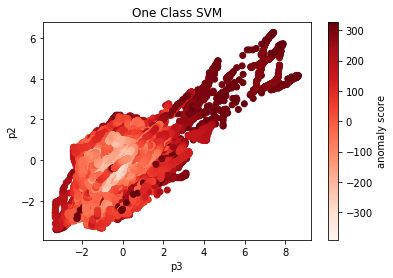

In [11]:
plotAnomalyScore2D_complete(df, clf_name, clf, 'p3','p2')

NameError: name 'df' is not defined

## PLAN
- Détecter les outliers avec : loi gaussienne, LOF, Isolation Forest
- Trouver les windows avec les plus grands nombres d'outliers 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.covariance import EllipticEnvelope
%matplotlib inline

In [13]:
df = pd.read_csv("dataset.csv")
day_cycle_window = df['day_cycle_window']
df = df.drop(['day_cycle_window'], axis=1)
df.head()

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.80827,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.80784,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.80784,-1.017575,-0.664906,3.049237,0.118828,-1.270237


In [ ]:
def plotAnomalyScore2D_complete(df, clf_name, clf, f1,f2):
    """
        Same, but if the classifier has been trained on the whole dataset
    """
    if clf_name == 'LOF':
        score = clf.negative_outlier_factor_
    else:
        score = clf.decision_function(df)
    
    plt.figure()
    sc = plt.scatter(x=df[f1],y=df[f2], c=-score, cmap='Reds')
    plt.colorbar(sc, label='anomaly score')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(clf_name)
    

On choisit ici:
- Contamination = 15%, ce qui ne signifie que nos classifiers cherchent 15% d'outliers. Cependant, comme nous allons utiliser ces résultats pour détecter les windows anormales, cela ne signifie pas qu'il y aura 15% de windows anormales
Et comme classifiers: 
- Elliptic Enveloppe, qui nous permettra d'éloigner les valeurs s'éloignant d'une répartition gaussienne des données
- Isolation Forest, pour éviter le swamping et le masking
- LOF, qui nous permettra aussi de trouver de trouver les points proches de clusters denses (locality aspect)

In [24]:
clf_name = 'Isolation Forest'
clf1 = IsolationForest(behaviour='new', n_estimators=100, contamination=0.1)
clf1.fit(df)

clf_name = 'Local Outlier Factor'
clf2 = LocalOutlierFactor(n_neighbors=5, contamination=0.1, novelty = True)
clf2.fit(df)

clf_name = 'cov'
cov = EllipticEnvelope(random_state=0).fit(df)
#cov.predict(df)

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.144974382184133 > -4.529208364942813). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.208945989900290 > -4.449420782490113). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.668037533566241 > -4.220385415087308). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.218002919207050 > -3.514101638467442). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.486221385148947 > -2.635832264796925). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.513214179737673 > -2.553229282256491). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.894970646027709 > -3.099913267459407). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.097343578607068 > -3.361525127818574). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.135128090894129 > -3.329994222046867). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.352027359603614 > -2.379318254451801). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.448393657600918 > -3.763486499290635). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.120784161076252 > -4.444560204470067). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.357807118291391 > -3.939588091747392). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.361025068955940 > -3.587135405702047). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.313080062682618 > -3.529487771523502). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.215827052093397 > -4.266625061656976). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.423001860091732 > -4.727169464544811). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.898444604239451 > -5.037886480110588). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.288819049581003 > -3.313806623887078). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.531999183477283 > -5.576249817102092). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.530320134210250 > -5.555775218109508). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.976602051058786 > -4.004095428807421). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.600484629074358 > -3.653485073127277). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.722595757967020 > -4.283094309617345). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.300804336825303 > -2.370888524710714). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.647762901616456 > -4.061245471488844). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.749216164398542 > -4.112832605522826). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.386726980723355 > -2.416032614730869). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.455780430100441 > -5.646642828855453). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1.778284260738541 > -1.829957140387026). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.148995666671406 > -4.524790028652827). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.821706761052514 > -3.822611074428942). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.115606895695024 > -3.247454052427868). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.943846757957073 > -4.966215652835839). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.003338183003387 > -5.273363372482392). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.063649692775576 > -3.328943970224925). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.393553682348986 > -3.754381041888319). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.531497825768846 > -3.693544940693086). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.770119964595531 > -4.442028790310134). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.563064104661076 > -3.597809926170662). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.839578253264341 > -6.186751096512351). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.348636318475806 > -5.650079001246220). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.361168473590812 > -3.506381408079061). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.434520302106387 > -3.573590764479373). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.560038946166066 > -3.850458073059471). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.565815435589195 > -3.578607211771976). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.494242059239688 > -3.519876934798265). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.223565722337045 > -3.260028763689837). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.530800304995452 > -3.647211415387881). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.991573605494812 > -5.340988109167263). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.927591700325545 > -5.151080009701325). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.919122060125275 > -3.972934141575377). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.449656550693092 > -4.765747638697190). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.848557095447292 > -4.385118750652900). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.052936677959098 > -3.193986927928171). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.166415084219667 > -3.350339961753121). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.439261230972387 > -3.510321738159133). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.851354708394300 > -4.940160184958018). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.504060527213858 > -3.891274760459419). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.273849241586782 > -3.478423111441122). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.993414629451276 > -3.733076048159094). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.318605703808025 > -3.511593474838974). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.509529530747255 > -3.532988175883778). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.776472333469448 > -3.838305408376690). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.656706098175147 > -3.904023487278241). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.836638568727956 > -4.344333025271678). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.440691151039984 > -5.583081468822919). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.895560901545481 > -4.148728168210474). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.038768880829731 > -3.146801089921360). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.962539133322863 > -3.681676690246347). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.475887734661226 > -3.780767183132255). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.155934104556753 > -3.659511083990703). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.587404566063011 > -5.854074514518541). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.434737884240612 > -5.607036521199012). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.370508791660592 > -5.746314426832802). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.618966211556795 > -3.641040469192177). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.565002838105930 > -3.647016043476866). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.547703390352348 > -3.551765582756782). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.041986232556825 > -4.083922262711237). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.944329951542176 > -4.043411596509321). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.015208853069249 > -4.045214872727025). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.920880518991635 > -2.928333155765760). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.968265823158136 > -2.989721870029030). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.025986774345290 > -3.033322432218821). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.881027572583085 > -4.434392503998120). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.800696801314863 > -4.404553497479373). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.053552779534337 > -4.552783538853272). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.841494347947046 > -4.590427066236167). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.071014826905518 > -4.444164382334689). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.370980404923854 > -4.402600847975165). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.060143220972142 > -4.533420077137010). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.182448721312022 > -4.347405682466377). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.085901380629601 > -4.330437722222379). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.877603744330045 > -4.516003959910944). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.820909684788993 > -4.427692138615667). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.545695604444315 > -4.429231301154596). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.078912116573425 > -4.234787542397633). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.099351999869055 > -4.136118079857727). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.119968510952423 > -4.155917485238315). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.864762655269576 > -4.577449248279138). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.579217838892110 > -4.542318356468605). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.249664393773777 > -4.483248490005835). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.794183201328169 > -4.442420172144113). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.222642584698183 > -4.373621207554550). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.230809545651892 > -4.398910681043786). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.216527298896879 > -4.432370553287091). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.210794252586270 > -4.311309168142048). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.750433600762362 > -4.482841575419916). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.267174770542485 > -4.394416348624604). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.080204117294009 > -4.114426825678064). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.222124725280829 > -4.293777951089727). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.844539797991423 > -4.459737155996784). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.900358592754552 > -4.358316080418247). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.303989649521144 > -4.359720284340673). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.149658178529032 > -4.191459623524548). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.052828202388300 > -4.509815037531161). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.129088848091611 > -4.351773439809591). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.765951797000271 > -3.986261817842867). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.862868521782032 > -4.316082281250729). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.056644943782931 > -4.169478142127398). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.972356615529884 > -4.542367808020119). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.141629032512443 > -4.359866902568637). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.167783936358676 > -4.529462709211876). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.996944229230552 > -4.358824567336285). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.781735052000400 > -4.361536726856404). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.059110845024470 > -4.482052056264381). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.211298942764457 > -4.367005783336797). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.163076443173355 > -4.386766090591109). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.280587798362097 > -4.288140288268182). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.170786837265748 > -4.354086083696867). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.982701252490592 > -4.484591558395803). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.257842058415680 > -4.483252743175215). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.219073632660826 > -4.267705048911479). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.905637775667033 > -4.532240274823359). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.076360911156118 > -4.110839803111165). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.863406399106539 > -4.366320046445722). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.176142594256619 > -4.345781183779591). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.101393294860027 > -4.320394998192618). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.804086000822456 > -4.409722837203122). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.211597652525526 > -4.244316137967867). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.968065081471077 > -4.487473131164240). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.224732853037409 > -4.366728834012831). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.311365342392242 > -4.406160591522384). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.799142609888097 > -4.375320318249883). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.833178118948509 > -4.517465775985832). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.100500575858838 > -4.453217542364154). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.088059261845714 > -4.510678880875300). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.903184261257954 > -4.404210370378369). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.955527609647236 > -4.260930485428880). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.960471079212776 > -4.456352686310886). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.122791663316023 > -4.496792661320617). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.758846384150559 > -4.492423214742651). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.156269065193871 > -4.442536326691585). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.116316590565102 > -4.186367099695643). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.186558530594768 > -4.303624055981977). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.261014052841149 > -4.308217259090927). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.212848034866473 > -4.233307912747486). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.669866789727959 > -4.453208045152749). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.064426550033827 > -4.320611320140245). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.343614029870987 > -4.500847011621063). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.269278385886330 > -4.270517809621657). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.413136323723846 > -4.528899175662774). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.568062399055051 > -4.190038668664320). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.816195401951088 > -4.481155454294987). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.867721065403182 > -4.487514725997274). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.796437332241329 > -4.442610576491625). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.119738561081398 > -4.386041933076144). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.059435595274199 > -4.097827946458430). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.308992243077704 > -4.530176876297318). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.138238923827149 > -4.186162946587872). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.003706693165197 > -4.193864786410559). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.807894557526006 > -4.285484602167175). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.122795817093778 > -4.541286157572674). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.981165811259824 > -4.546039535429538). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.229193004623557 > -4.314414153541932). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.120452266038734 > -4.377460395347025). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.976063152262456 > -4.543981656713946). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.981881380847183 > -4.217830522753097). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.017472874790361 > -4.505116251489834). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.222936693360065 > -4.223627387130762). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.922317563231299 > -4.479403563754905). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.380962732649653 > -4.457618720097295). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.992511839424544 > -4.064039794204363). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.154020291267734 > -4.157589220953438). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.868567326288203 > -4.525346652218366). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.923143426438386 > -4.125400896360249). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.114354236711577 > -4.338300705811403). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.769654972160871 > -4.410233921164939). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.242035269192299 > -4.394943921045975). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.780782300330253 > -4.178593627873243). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.850943283526522 > -4.006873156372188). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.771224545231523 > -3.869477594773931). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.676168640300763 > -4.483064433940258). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.880939418739542 > -4.482294513615130). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.671821342280592 > -4.365804144513457). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.890474648727614 > -4.131070273960935). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.844427309485669 > -4.408333189518883). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.867986192282792 > -4.125431654374221). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.343499269918837 > -4.366415355785879). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.201088440588151 > -4.359077357303351). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.927369900922430 > -4.478804590451987). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.168145267744134 > -4.398582339559339). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.005880953510810 > -4.503776008124584). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.988210571479645 > -4.479601910255862). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.940432781343962 > -4.488929754631276). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.130763460996574 > -4.142130260461601). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.807746229384578 > -4.487017989146197). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.957814958151867 > -4.261800358530831). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.937513260686211 > -4.486274634175608). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.806238124423200 > -4.438308452940047). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.145130430302592 > -4.430060943488431). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.187680706729589 > -4.416128486990529). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.141224079342586 > -4.255169601343665). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.883099149597574 > -4.311683456344029). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.627979160263825 > -4.312628404581876). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.828455708028204 > -4.267451633000000). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.894364538555629 > -4.296881233770963). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.830993949055742 > -4.469049730055954). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.151330507238391 > -4.345244863094647). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.251319075210106 > -4.276165823921201). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.638536265195831 > -3.806762579302083). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.300165625627603 > -4.436499293127657). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.188808975389064 > -4.415078739935467). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.086718948686375 > -4.459330601468059). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.308262700809046 > -4.332239083538163). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.639074800664694 > -3.962739189028132). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.297039846178648 > -4.459941124021333). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.281359957267480 > -4.402655129101418). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.697781198531477 > -4.492889675271451). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.891371260716945 > -4.490097691467056). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.886430316342118 > -4.530038247370834). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.145344821591204 > -4.237068709186949). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.115008413387797 > -4.385288110725098). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.970542817423866 > -4.463834299925334). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.959686767737735 > -4.544714022318372). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.129152984372796 > -4.321308830547437). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.070221195764741 > -4.331370171623034). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.202054342363052 > -4.512286428342566). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.273894812802267 > -4.515966368803101). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.447477141944317 > -4.554840341713311). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.672464360089385 > -4.223661696325433). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.642255395271790 > -4.222593607719523). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.151854754700890 > -4.392690781797276). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.031359283236860 > -4.517932345286919). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.307635072056056 > -4.463906535783881). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.085404107438602 > -4.444496230766967). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.857595819615095 > -4.474979646859584). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.861663731600843 > -4.201384974988242). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.422379308323643 > -4.461829630823090). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.162197991994639 > -4.476517273320176). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.129792311917408 > -4.497104648140628). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.897585188586687 > -4.438970720469056). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.887724253935875 > -4.088137601314304). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.951829064771154 > -4.011127805222089). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.153604197994055 > -4.154527747731159). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.268399607152253 > -4.555195358270971). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.004036347316947 > -4.517619900152288). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.019062362816848 > -4.461469068183531). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.178201899969500 > -4.461611908264729). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.184366331998907 > -4.227810663741189). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.027448309456379 > -4.267616660110573). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.266271118335261 > -4.291847783116052). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.267639481553489 > -4.313848639170783). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.106441087506025 > -4.321076027698948). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.147665603391828 > -4.315854123511837). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.056462867490701 > -4.371546339036648). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.111839891486811 > -4.313431466146003). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.227106771774346 > -4.332637774223287). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.116924474520188 > -4.319596954116783). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.863038721793722 > -4.425080596144181). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.255151209678058 > -4.395476412890430). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.086293459890962 > -4.578512251388311). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.204975245258240 > -4.389821957980423). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.220085692253549 > -4.262003703271791). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.120932530087980 > -4.344173467682629). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.221984760865396 > -4.247291989460237). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.308829920584632 > -4.522114357511877). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.873414926823412 > -4.130749532491699). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.070167602638745 > -4.360552365275030). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.165133717212392 > -4.184567158497657). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.772013608831680 > -4.127037659398547). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.098591733832711 > -4.171105544144727). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.157512210597394 > -4.182946048744788). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.885052207075177 > -3.973082392333169). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.677567873630080 > -3.954911018129249). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeW

/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.328769041527222 > -3.395653187097176). You may want to try with a higher value of support_fraction (current value: 0.500).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.345117645136046 > -3.563259132749049). You may want to try with a higher value of support_fraction (current value: 0.500).
  RuntimeWarning)
/Users/axel/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.294473598916173 > -3.389478351182631). You may want to try with a higher value of support_fraction (current value: 0.500).
  RuntimeW

In [18]:
clf2.predict(df)

array([ 1,  1,  1, ...,  1,  1, -1])

In [20]:
cov.predict(df)

array([1, 1, 1, ..., 1, 1, 1])

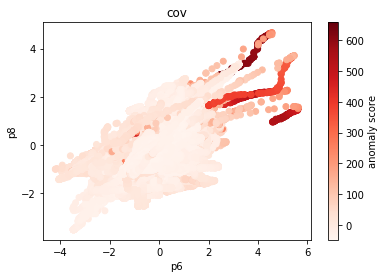

In [30]:
plotAnomalyScore2D_complete(df, clf_name, cov, 'p6','p8')

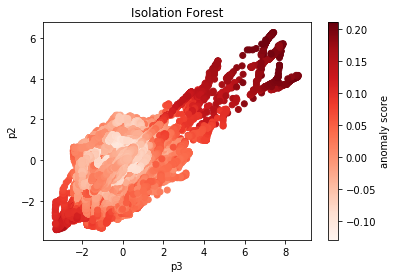

In [26]:
plotAnomalyScore2D_complete(df, 'Isolation Forest', clf1, 'p3','p2')

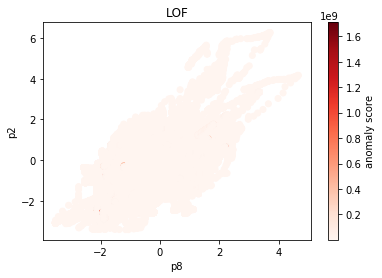

In [31]:
plotAnomalyScore2D_complete(df, 'LOF', clf2, 'p8','p2')